Defining all the functions again modifying for the current context

In [63]:
import numpy as np 
import matplotlib.pyplot as plt 
import numdifftools as nd

In [64]:
def well_conditioned(x):
    return ((x[0]-15)*(x[0]-15)+(x[1]-1)*(x[1]-1))

In [65]:
well_conditioned_gradient=nd.Gradient(well_conditioned)

In [66]:
def ill_conditioned(x):
    return (10*(x[0]-3)*(x[0]-3)+(x[1]-1)*(x[1]-1))

In [67]:
ill_conditioned_gradient=nd.Gradient(ill_conditioned)

In [68]:
def gradient_descent(Func,Func_gradient,xnot,ynot,alpha=.1,steps=500,tol=1e-4):
    current_point=[xnot,ynot]
    learning_rate=alpha
    path=[]
    x_path1=[]
    y_path1=[]
    X_not=[current_point[0],current_point[1]]
    for el in range(steps):
        Gradi__=well_conditioned_gradient(X_not)
        X_point,Y_point = current_point[0]-learning_rate*Gradi__[0],current_point[1]-learning_rate * Gradi__[1]
        X_not=[X_point,Y_point]
        current_point =(X_point,Y_point,Func(X_not))
        x_path1.append(current_point[0])
        y_path1.append(current_point[1])
        if np.linalg.norm(Gradi__)<tol:
            print("steps_taken")
            print(el)
            break

    #path.append(z_path3)
    return x_path1,y_path1



In [69]:
def gradient_descent_with_backtracking(Func,Func_gradient,xnot,ynot,alpha=0.1,beta=0.1,rho=1,steps=500,tol=1e-4):
    current_point=[xnot,ynot]
    iteration_count=0
    collection=[]
    max_iteration=steps
    x=[]
    y=[]
    while iteration_count<max_iteration:
        gradient=Func_gradient(current_point)
        step_size=alpha
        while Func(current_point-step_size*gradient)>Func(current_point)+rho*step_size*np.dot(gradient,gradient):
            step_size*=beta
        current_point= current_point-step_size*gradient
        collection.append(current_point)
        x.append(current_point[0])
        y.append(current_point[1])
        if np.linalg.norm(gradient)<tol:
            print("steps_taken")
            print(iteration_count)
            print(current_point[0],current_point[1])
            break
        iteration_count+=1
    return collection,x,y

In [70]:
def error(a,b):
    fx=a[-1]
    bx=b[-1]
    err=[]
    er=0
    step=[]
    for el in range(len(a)):
        er=(np.abs(fx**2-(a[el])**2)+np.abs((bx**2)-(b[el])**2))**(.5)
        err.append(er)
        step.append(el)
    return err,step


In [71]:
def plot_question_graph(xnot,ynot,stepsi=500,alpha=.4,Func=well_conditioned,Func_gradient=well_conditioned_gradient):
    x_descent_,y_descent_=gradient_descent(Func,Func_gradient,xnot,ynot,alpha,steps=stepsi)
    error_des,step_des=error(x_descent_,y_descent_)
    _,x_backtrack_,y_backtrack_=gradient_descent_with_backtracking(Func,Func_gradient,xnot,ynot,alpha=.8,steps=stepsi)
    error_back,step_back=error(x_backtrack_,y_backtrack_)
    fig, axs = plt.subplots(2, 2)
    x =np.arange(-80,80,0.05)
    #Plot the function in 3d space by default code
    y = np.arange(-80,80,0.05)
    x_3d,y_3d =np.meshgrid(x,y)
    z_3d = Func([x_3d,y_3d])
    axs[0,0].set_title("alpha = "+str(alpha))
    axs[0,1].set_title("alpha = "+str(alpha))
    axs[1,0].set_title("alpha = "+str(alpha))
    axs[0,0].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)
    axs[0,0].plot(x_descent_,y_descent_)
    axs[1,0].plot(step_des,error_des)
    axs[0,1].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)
    axs[0,1].plot(x_backtrack_,y_backtrack_)
    axs[1,0].set_yscale('log')
    axs[1,1].set_yscale('log')
    axs[1,1].plot(step_back,error_back)
    plt.show()

steps_taken
9
steps_taken
27
15.000011053695987 1.0000270201457437


C:\Users\itsja\AppData\Local\Temp\ipykernel_20928\752647062.py:15: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  axs[0,0].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)
C:\Users\itsja\AppData\Local\Temp\ipykernel_20928\752647062.py:18: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  axs[0,1].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)


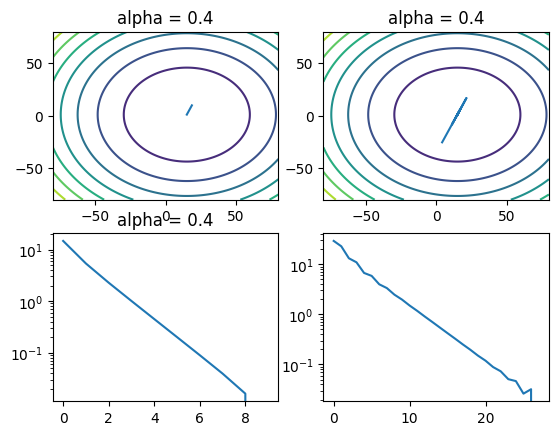

In [72]:
plot_question_graph(33,45)

In [73]:
def plot_question_graph(xnot,ynot,stepsi=500,alpha=.95,Func=ill_conditioned,Func_gradient=ill_conditioned_gradient):
    x_descent_,y_descent_=gradient_descent(Func,Func_gradient,xnot,ynot,alpha,steps=stepsi)
    error_des,step_des=error(x_descent_,y_descent_)
    _,x_backtrack_,y_backtrack_=gradient_descent_with_backtracking(Func,Func_gradient,xnot,ynot,alpha,steps=stepsi)
    error_back,step_back=error(x_backtrack_,y_backtrack_)
    fig, axs = plt.subplots(2, 2)
    x =np.arange(-80,80,0.05)
    #Plot the function in 3d space by default code
    y = np.arange(-80,80,0.05)
    x_3d,y_3d =np.meshgrid(x,y)
    z_3d = Func([x_3d,y_3d])
    axs[0,0].set_title("alpha = "+str(alpha))
    axs[0,1].set_title("alpha = "+str(alpha))
    axs[1,0].set_title("alpha = "+str(alpha))
    axs[0,0].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)
    axs[0,0].plot(x_descent_,y_descent_)
    axs[1,0].set_yscale('log')
    axs[1,0].plot(step_des,error_des)
    axs[0,1].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)
    axs[1,0].set_yscale('log')
    axs[1,0].plot(step_back,error_back)
    axs[0,1].plot(x_backtrack_,y_backtrack_)
    plt.show()

steps_taken
135
steps_taken
148
2.9999958932556283 1.0000000000015965


C:\Users\itsja\AppData\Local\Temp\ipykernel_20928\282570513.py:15: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  axs[0,0].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)
C:\Users\itsja\AppData\Local\Temp\ipykernel_20928\282570513.py:19: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  axs[0,1].contour(x_3d, y_3d, Func([x_3d,y_3d]),edgecolor='Black',zorder=0)


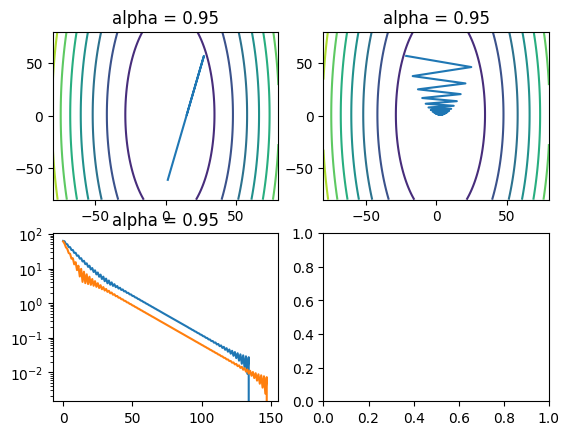

In [74]:
plot_question_graph(30,70)